<a href="https://colab.research.google.com/github/RexGod/Training-cifar10-dataset-by-fully-connected-nueral_Network/blob/main/ex5_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Section

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets,models,layers
import matplotlib.pyplot as plt
import numpy as np

Load cifar10 Data

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [16]:
#y_train[0] #array([6], dtype=uint8)
#y_train[1] array([9], dtype=uint8)
y_train[2] #array([9], dtype=uint8)
# return an integer number betweeen 0-9 reference to class

array([9], dtype=uint8)

reference : https://github.com/codebasics/py/blob/master/DeepLearningML/10_gpu_benchmarking/gpu_performance_test_small_image_classification.ipynb

In [17]:
''' def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index]) '''
#plot_sample(0) this was ghorbaghe   
#plot_sample(1) this was truck
#plot_sample(2) #truck

' def plot_sample(index):\n    plt.figure(figsize = (10,1))\n    plt.imshow(x_train[index]) '

In [18]:
x_train.shape
#x_test.shape
x_train[0] # pixele ye adadie bein 0 ta 255

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [19]:
x_train = x_train / 255 # normalize mikonim inja ham vase data haye test ham vse train
x_test = x_test / 255

In [20]:
classes = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships','trucks']

In [21]:
y_train_to_categorical = keras.utils.to_categorical(
    y_train, num_classes=len(classes), dtype='float32'
)
y_test_to_categorical = keras.utils.to_categorical(
    y_test, num_classes=len(classes), dtype='float32'
)

In [22]:
network = models.Sequential()
#x_inputs=network.add(layers.Flatten(input_shape=(32, 32))) 
network.add(layers.Flatten())

In [23]:
network.add(layers.Dense(1, input_shape=(32, 32, 3))) # input_layer
network.add(layers.Dense(512,activation='ELU')) #hidden_layer1
network.add(layers.Dense(256,activation='relu')) #hidden_layer2
network.add(layers.Dense(128, activation='relu')) #hidden_layer3
network.add(layers.Dense(64, activation='relu')) #hidden_layer4
network.add(layers.Dense(32, activation='relu')) #hidden_layer5
network.add(layers.Dense(len(classes), activation='softmax'))  #output_layer


In [24]:
network.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )



In [25]:
network.fit(x_train, y_train_to_categorical , epochs=5,validation_data=(x_test,y_test_to_categorical))

Epoch 1/5
1563/1563 [==============================] - 26s 11ms/step - loss: 2.1642 - accuracy: 0.1660 - val_loss: 2.0638 - val_accuracy: 0.1783
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 2.0560 - accuracy: 0.1911 - val_loss: 2.0620 - val_accuracy: 0.1869
Epoch 3/5
1563/1563 [==============================] - 15s 10ms/step - loss: 2.0405 - accuracy: 0.1996 - val_loss: 2.0618 - val_accuracy: 0.1939
Epoch 4/5
1563/1563 [==============================] - 12s 8ms/step - loss: 2.0337 - accuracy: 0.2008 - val_loss: 2.0234 - val_accuracy: 0.1989
Epoch 5/5
1563/1563 [==============================] - 15s 10ms/step - loss: 2.0289 - accuracy: 0.2025 - val_loss: 2.0435 - val_accuracy: 0.2012


Epoch 1/5
1563/1563 [==============================] - 16s 10ms/step - loss: 2.0263 - accuracy: 0.2033 - val_loss: 2.0312 - val_accuracy: 0.1985
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 2.0237 - accuracy: 0.2054 - val_loss: 2.0146 - val_accuracy: 0.2043
Epoch 3/5
1563/1563 [==============================] - 15s 10ms/step - loss: 2.0215 - accuracy: 0.2054 - val_loss: 2.0351 - val_accuracy: 0.1999
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 2.0194 - accuracy: 0.2063 - val_loss: 2.0186 - val_accuracy: 0.2080
Epoch 5/5
1563/1563 [==============================] - 18s 11ms/step - loss: 2.0184 - accuracy: 0.2076 - val_loss: 2.0135 - val_accuracy: 0.2120
Epoch 1/5
1563/1563 [==============================] - 15s 10ms/step - loss: 2.0180 - accuracy: 0.2069 - val_loss: 2.0280 - val_accuracy: 0.1987
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 2.0169 - accuracy: 0.2092 - val_loss: 2.0207 - val_accu

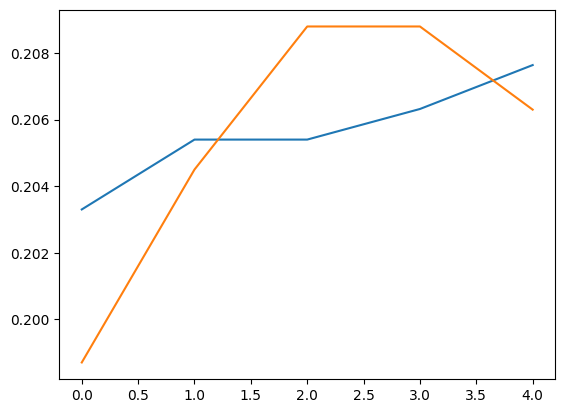

In [26]:
plt.plot(network.fit(x_train, y_train_to_categorical , epochs=5,validation_data=(x_test,y_test_to_categorical)).history['accuracy'])
plt.plot(network.fit(x_train, y_train_to_categorical , epochs=5,validation_data=(x_test,y_test_to_categorical)).history['val_accuracy'])

